### Part-1
#### Building Your First Predictive Model with Mean Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data['Mean_sales']= data['Sale_Price'].mean()
data['Mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: Mean_sales, dtype: float64

Mean sale price is same for every house, therefore we will improve it a bit.

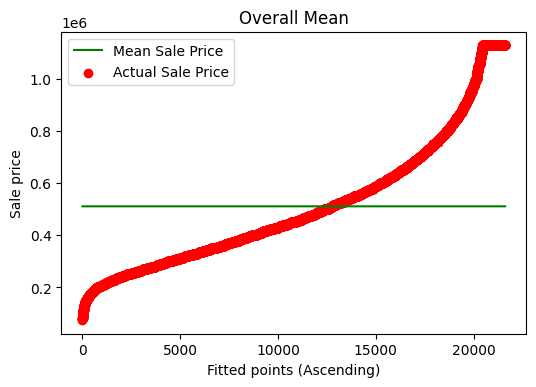

In [ ]:
# Plotting and visualising the data
plt.figure(dpi=100)
k=range(0,len(data))
plt.scatter(k,data['Sale_Price'].sort_values(),color='red',label='Actual Sale Price')
plt.plot(k,data['Mean_sales'].sort_values(),color='green',label='Mean Sale Price')
plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Sale price')
plt.title('Overall Mean')
plt.legend()

**Conclusion**: Mean sale is not a good predictor for very high priced and very low priced house

### Part-2: Improvement upon the mean regression model.

In [ ]:
grades_mean = data.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [ ]:
# Making new column
data['grade_mean']=0

# for every grade fill its mean price in new column
for i in grades_mean.columns:
  data['grade_mean'][data['Overall Grade']==i]= grades_mean[i][0]
data['grade_mean'].head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [ ]:
# visualizing
gradewise_list = []
for i in range(1,11):
  k = data['Sale_Price'][data['Overall Grade']==i]
  gradewise_list.append(k)

In [ ]:
classwise_list = []
for i in range(1,11):
  k = data['Sale_Price'][data['Overall Grade']==i]
  classwise_list.append(k)

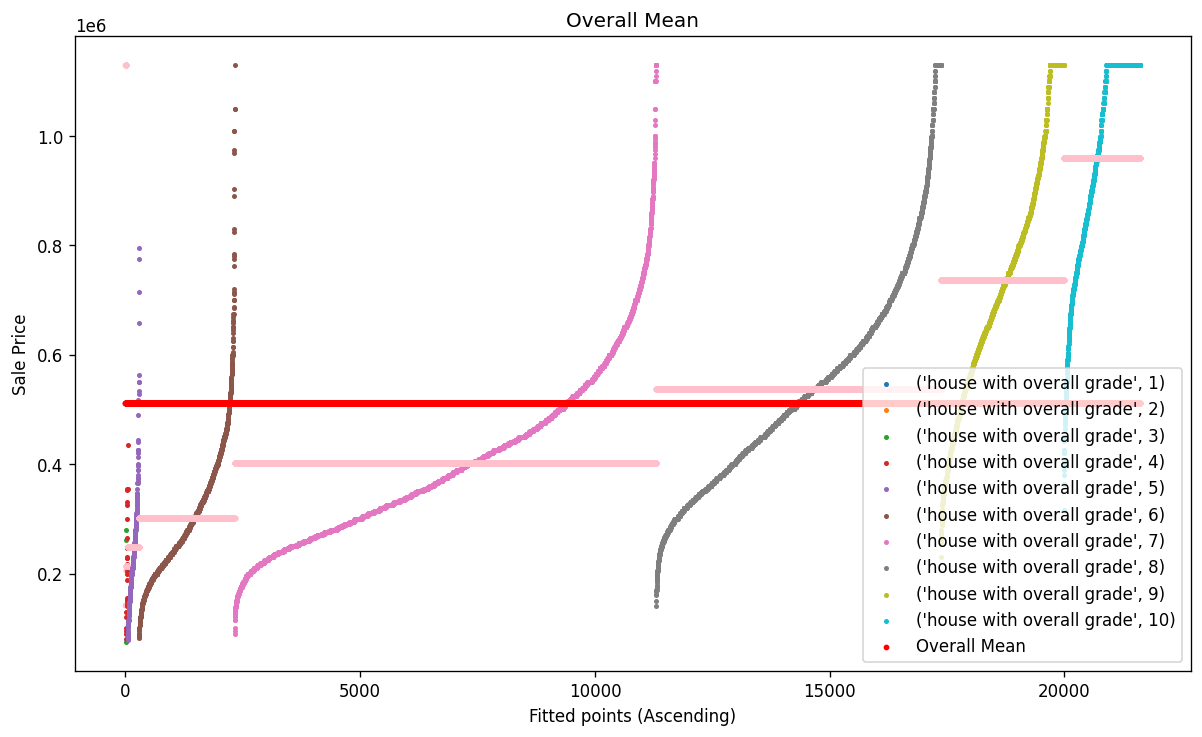

In [ ]:
plt.figure(dpi=120,figsize=(12,7))
###### Plotting 'Sale_price' gradewise #######
# z variable is for x-axis
z=0
for i in range(1,11):
  points=[k for k in range(z,z+len(classwise_list[i-1]))]

  plt.scatter(points, classwise_list[i-1].sort_values(),label=('house with overall grade',i),s=4)

  plt.scatter(points,[classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],s=6,
              color='pink')
  z=max(points)+1

############ Plotting overall mean ##########
plt.scatter([q for q in range(0,z)],
            data['Mean_sales'],
            color='red',
            label='Overall Mean',
            s=6)
plt.xlabel("Fitted points (Ascending)")
plt.ylabel("Sale Price")
plt.title("Overall Mean")
plt.legend(loc=4)

### part-3--> Residual Plot

In [ ]:
mean_difference = data['Mean_sales']- data['Sale_Price']
grade_mean_difference = data['grade_mean']-data['Sale_Price']

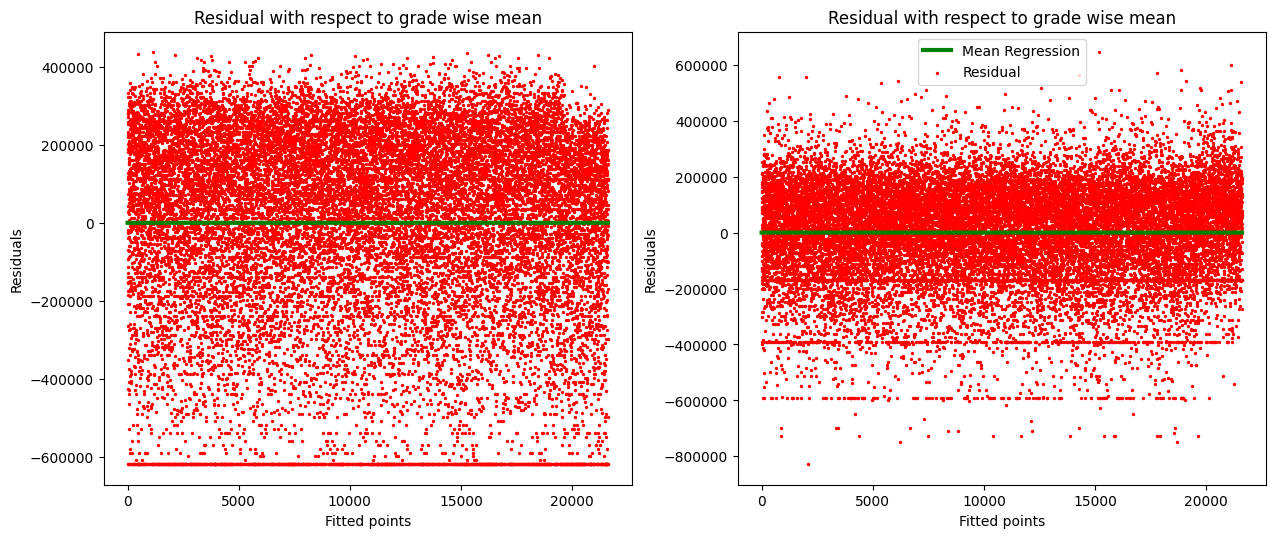

In [ ]:
k = range(0,len(data))
l = [0 for i in range(len(data))]

plt.figure(figsize=(15,6),dpi=100)

plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color='red',label='Residual',s=2)
plt.plot(k,l,color='green',label='Mean Regression',linewidth=3)
plt.xlabel("Fitted points")
plt.ylabel('Residuals')
plt.title("Residual with respect to grade wise mean")

plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference,color='red',label='Residual',s=2)
plt.plot(k,l,color='green',label='Mean Regression',linewidth=3)
plt.xlabel("Fitted points")
plt.ylabel('Residuals')
plt.title("Residual with respect to grade wise mean")


plt.legend()

First model have high residual as it is more spread. Hence model 2 is a perfect model

### Model Evalution Metrics part-1

In [ ]:
# Calculating Mean Error

cost = sum(mean_difference)/len(data)
print(round(cost,7))

# Value must be zero?? Why-->Because some error are positive and some are negative , therefore overall sum is zero


0.0


To overcome this problem, we will take absolute value, hence it is called mean absolute error.

Residual or individual error= Presicted values- Actual values.


### Mean Absolute Error

**Take the absolute value of each individual error term, sum it up for all the data points and then take a mean.**

Let

A= Predicted value

B= Actual value

n= total number of data points.

**MAE** = (1/n)*(sum(abs(B-A))


In [ ]:
Y= data['Sale_Price']
Y_hat1= data['Mean_sales']
Y_hat2= data['grade_mean']

n= len(data)
len(Y), len(Y_hat1),len(Y_hat2),n


(21609, 21609, 21609, 21609)

In [ ]:
# MAE for first model
cost_mean= sum(abs(Y_hat1-Y))/n
cost_mean

199168.78146839526

In [ ]:
# MAE for model 2
cost_grade_mean= sum(abs(Y_hat2-Y))/n
cost_grade_mean

# Lower MAE for model 2 as compare to model 1 

137081.70298203363

In [ ]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(Y_hat2,Y)
cost_grade_mean

137081.7029820291

#### Mean Squared Error(MSE)

MSE = sum(pow((A-B),2))/n

In [ ]:
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)
cost_grade_mean= mean_squared_error(Y_hat2,Y)
cost_mean, cost_grade_mean

(62528116847.799576, 30804835720.342426)

#### Root mean squared error (RMSE)
>Tells about the presence or absence of the large errors

>Gives the expected average distance between the actual points and the predictions

**Formula--->sqrt(MSE)**


In [ ]:
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)**0.5
cost_grade_mean= mean_squared_error(Y_hat2,Y)**0.5
cost_mean, cost_grade_mean

(250056.2273725643, 175513.06424406826)

#### R^2

It gives us the relative error of a regression model with respect to the simple mean regression model.

> The degree to which your input variables explain the variation of your target or output variable.

In [ ]:
Y = data['Sale_Price']
Y_bar= data['Mean_sales']
Y_hat= data['grade_mean']
n=len(data)

In [ ]:
mse_mean = mean_squared_error(Y_bar,Y)
mse_mean

62528116847.799576

In [ ]:
mse_model= mean_squared_error(Y_hat,Y)
mse_model

30804835720.342426

In [ ]:
R2= 1-(mse_model/mse_mean)
R2

0.5073442592981836

Applying the concept of linear regression

In [ ]:
# Making the regression model for sale_price based on flat_area
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data= pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


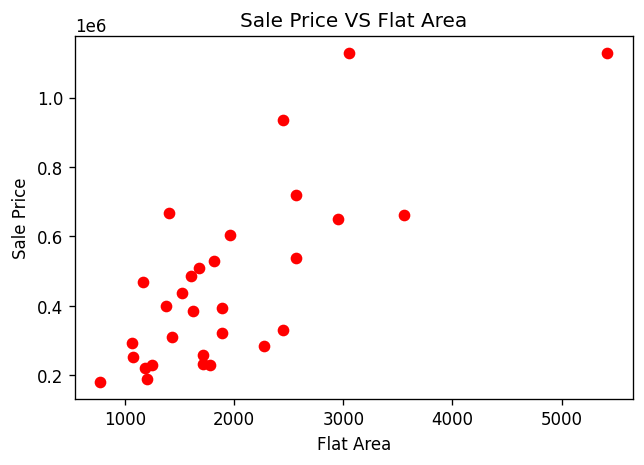

In [ ]:
plt.figure(dpi=120)
plt.scatter(sample_data.flat_area, sample_data.sale_price,color='red')
plt.xlabel("Flat Area")
plt.ylabel("Sale Price")
plt.title('Sale Price VS Flat Area')
plt.show()

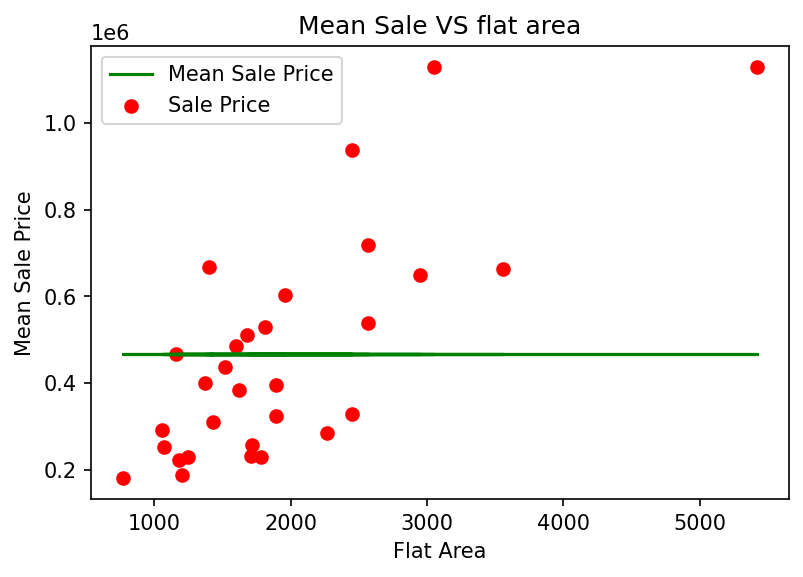

In [ ]:
# Making Mean sale Price model

sample_data['mean_sale_price'] = sample_data.sale_price.mean()
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area, sample_data.sale_price,color='red',label='Sale Price')
plt.plot(sample_data.flat_area,sample_data.mean_sale_price,color='green',label="Mean Sale Price")
plt.xlabel('Flat Area')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale VS flat area')
plt.legend()
plt.show()

Green line represent average sale price.

#### Conclusion: The Mean regression model says that every new house listed would have the same price irrespective of the flat area which is not correct.

### Parameter of linear regression model

cost function curves.

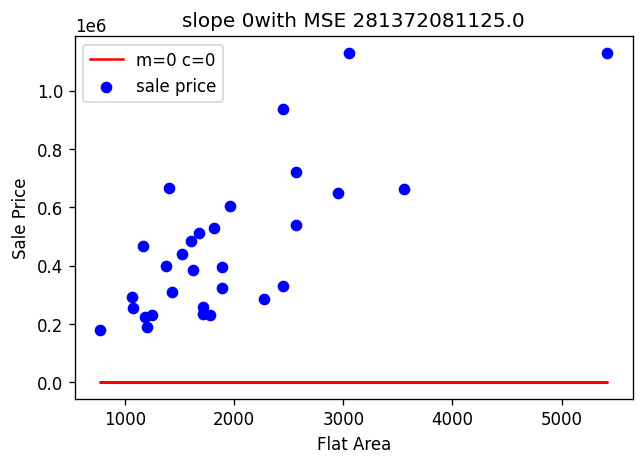

In [ ]:
c=0
m=0
line=[]

for i in range(len(sample_data)):
  line.append(sample_data.flat_area[i]*m+c)

plt.figure(dpi=120)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color='blue',label='sale price')
plt.plot(sample_data.flat_area,line,color='red',label='m=0 c=0')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
MSE= mean_squared_error(sample_data.sale_price,line)
plt.title("slope "+ str(m)+ "with MSE "+ str(MSE))
plt.legend()
plt.show()


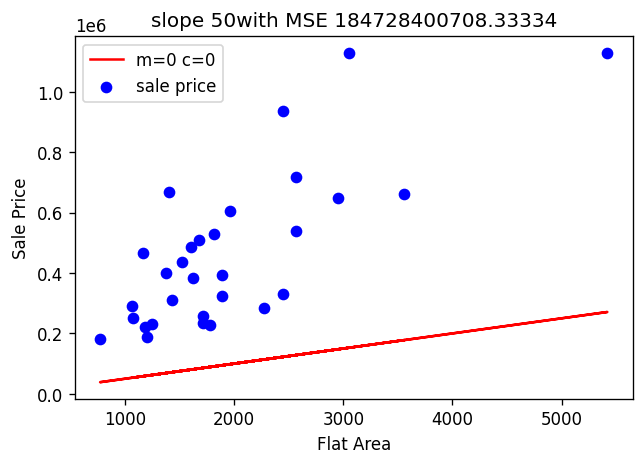

In [ ]:
c=0
m=50
line=[]

for i in range(len(sample_data)):
  line.append(sample_data.flat_area[i]*m+c)

plt.figure(dpi=120)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color='blue',label='sale price')
plt.plot(sample_data.flat_area,line,color='red',label='m=0 c=0')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
MSE= mean_squared_error(sample_data.sale_price,line)
plt.title("slope "+ str(m)+ "with MSE "+ str(MSE))
plt.legend()
plt.show()


In [ ]:
# Automated the task

def slope_Error(slope,intercept,sample_data):
  sale=[]
  for i in range(len(sample_data.flat_area)):
    tmp= sample_data.flat_area[i]*slope+intercept
    sale.append(tmp)
  MSE= mean_squared_error(sample_data.sale_price,sale)
  return MSE

In [ ]:
slope = [i/10 for i in range(0,5000)]
Cost=[]
for i in slope:
  cost= slope_Error(slope=i,intercept=0,sample_data=sample_data)
  Cost.append(cost)


In [ ]:
Cost_table = pd.DataFrame({
    'slope':slope,
    'cost':Cost
})
Cost_table.tail()

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


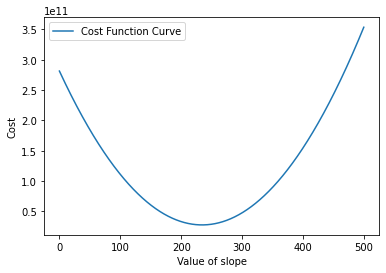

In [ ]:
plt.plot(Cost_table.slope,Cost_table.cost,label="Cost Function Curve")
plt.xlabel("Value of slope")
plt.ylabel("Cost")
plt.legend()

**Conclusion** : As we increase the value of slope then cost decreases upto a certain point.

From curve we can see we have minimun cost at a point of **234**.

**Convex Curves**: A convex curve has a minimum value at a certain point.It have only one point of minimum value and called *Global Minimum* .

**Non convex curve**:  A non convex curve does not have a single minimum.Those small region is called *local minima*.

In [ ]:
new_slope = Cost_table['slope'][Cost_table['cost']==Cost_table['cost'].min()].values
new_slope[0]

234.3

In [ ]:
def intercept_Error(slope,intercept,sample_data):
  sale=[]
  for i in range(len(sample_data.flat_area)):
    tmp= sample_data.flat_area[i]*slope+intercept
    sale.append(tmp)
  MSE= mean_squared_error(sample_data.sale_price,sale)
  return MSE

In [ ]:
intercept = [i for i in range(5000,50000)]
Cost= []
for i in intercept:
  cost= intercept_Error(slope=234,intercept=i,sample_data=sample_data)
  Cost.append(cost)

In [ ]:
intercept_table = pd.DataFrame({
    'intercept':intercept,
    'cost':Cost
})
intercept_table.head()

,intercept,cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


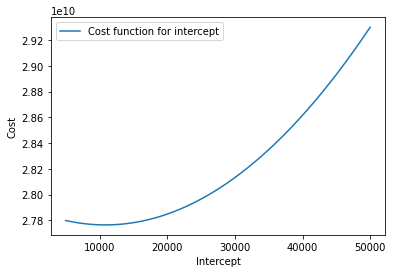

In [ ]:
# plotting the intercept plot
plt.plot(intercept_table.intercept,intercept_table.cost,label='Cost function for intercept')
plt.xlabel("Intercept")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [ ]:
new_intercept = intercept_table['intercept'][intercept_table['cost']==intercept_table['cost'].min()].values
new_intercept[0]

10834

Now putting this **intercept** in main slope function and again finding the curve and new value of intercept

In [ ]:
slope = [i/10 for i in range(0,5000)]
Cost=[]
for i in slope:
  cost= slope_Error(slope=i,intercept=10834,sample_data=sample_data)
  Cost.append(cost)


In [ ]:
Cost_table = pd.DataFrame({
    'slope':slope,
    'cost':Cost
})
Cost_table.tail()

,slope,cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


In [ ]:
new_slope = Cost_table['slope'][Cost_table['cost']==Cost_table['cost'].min()].values
new_slope[0]

229.7

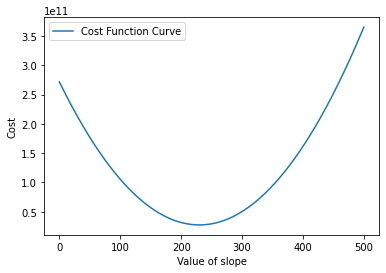

In [ ]:
plt.plot(Cost_table.slope,Cost_table.cost,label="Cost Function Curve")
plt.xlabel("Value of slope")
plt.ylabel("Cost")
plt.legend()

The optimum value of slope would depend on the value of intercept and vice versa

#### Now repeat the same procedure till we get m=219 and c=39428

hence equation for the best fit line or best regression line model is

Y= 219X + 39428

### Gradient Descent
It is an optimization algorithm that works iteratively and aims to find the minimun value of a convex function with respect to a set of parameters.

#### Following Steps involved.
**Step-1** : Random Initialization.

Slope m, Intercept c (Take random value)

**Step-2**: Generate Predictions.

Equation of line  y_hat= mX+C (m,c-->Already initialize).

**Step-3**: Calculating the cost.

t (tau)= sum((y_hat - y)/n)

**Step-4**:Updation of Parameters

#### Implementing Gradient Descent

Defining functions

In [ ]:
def param_init(Y):
  '''
  Step-1
  Y= target variable
  return initialize value of m and c
  '''

  m=0.1
  c=Y.mean()
  return m,c

In [ ]:
def generate_prediction(m,c,X):
  '''
  step-2
  X= independent variable
  return prediction generated by line with parameters m,c
  '''
  prediction=[]
  for x in X:
    pred=(m*x)+c
    prediction.append(pred)
  return prediction

In [ ]:
def compute_cost(prediction,Y):
  '''
  step-3
  return the mean squared error between prediction and Y
  '''
  cost = np.sum(((prediction-Y)**2)/len(Y))
  return cost



In [ ]:
def gradient(prediction,Y,X):
  '''
  step-4 part-1
  return Gradient corresponding to m and c
  '''
  n=len(Y)
  Gm = 2/n*np.sum((prediction-Y)*X)
  Gc = 2/n*np.sum((prediction-Y))
  return Gm,Gc

In [ ]:
def param_update(m_old,c_old,Gm_old,Gc_old,alpha):
  '''
  step-4 part-2
  Update and return the new value of m and c
  '''
  m_new = m_old-alpha*Gm_old
  c_new = c_old-alpha*Gc_old
  return m_new,c_new

In [ ]:
def result(m,c,X,Y,cost,predictions,i):
  # print and plot the final result obtained from gradient descent
  # If the Gradient Descent converged to the optimum value before max_iter

  if i<max_iter-1:
    print("****** Gradient Descent has converged at iteration {} ******".format(i))
  else:
    print("******* Result after",max_iter,'iteration is: *****')
  
  # Plotting the final result
  plt.figure(figsize=(14,7),dpi=120)
  plt.scatter(X,Y,color='red',label='data points')
  label='final regression line: m={}; c={}'.format(str(m),str(c))
  plt.plot(X,predictions,color='blue',label=label)
  plt.xlabel('Flat_area')
  plt.ylabel('Sale_price')
  plt.title('Final regression line')
  plt.legend()
    

After Iteration 0 : m = 3499072.307222223 ; c = 465999.44299999997 ; Cost = 64177937552.075005
After Iteration 20 : m = 7.115927055971628e+105 ; c = 2.997778392048355e+102 ; Cost = 2.7417231010181384e+208
After Iteration 40 : m = 1.447154337383132e+205 ; c = 6.096532424296826e+201 ; Cost = inf
After Iteration 60 : m = 2.9430538842431367e+304 ; c = 1.2398417341018387e+301 ; Cost = inf
After Iteration 80 : m = nan ; c = nan ; Cost = nan
After Iteration 100 : m = nan ; c = nan ; Cost = nan
After Iteration 120 : m = nan ; c = nan ; Cost = nan
After Iteration 140 : m = nan ; c = nan ; Cost = nan
After Iteration 160 : m = nan ; c = nan ; Cost = nan
After Iteration 180 : m = nan ; c = nan ; Cost = nan
After Iteration 200 : m = nan ; c = nan ; Cost = nan
After Iteration 220 : m = nan ; c = nan ; Cost = nan
After Iteration 240 : m = nan ; c = nan ; Cost = nan
After Iteration 260 : m = nan ; c = nan ; Cost = nan
After Iteration 280 : m = nan ; c = nan ; Cost = nan
After Iteration 300 : m = nan ;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


After Iteration 560 : m = nan ; c = nan ; Cost = nan
After Iteration 580 : m = nan ; c = nan ; Cost = nan
After Iteration 600 : m = nan ; c = nan ; Cost = nan
After Iteration 620 : m = nan ; c = nan ; Cost = nan
After Iteration 640 : m = nan ; c = nan ; Cost = nan
After Iteration 660 : m = nan ; c = nan ; Cost = nan
After Iteration 680 : m = nan ; c = nan ; Cost = nan
After Iteration 700 : m = nan ; c = nan ; Cost = nan
After Iteration 720 : m = nan ; c = nan ; Cost = nan
After Iteration 740 : m = nan ; c = nan ; Cost = nan
After Iteration 760 : m = nan ; c = nan ; Cost = nan
After Iteration 780 : m = nan ; c = nan ; Cost = nan
After Iteration 800 : m = nan ; c = nan ; Cost = nan
After Iteration 820 : m = nan ; c = nan ; Cost = nan
After Iteration 840 : m = nan ; c = nan ; Cost = nan
After Iteration 860 : m = nan ; c = nan ; Cost = nan
After Iteration 880 : m = nan ; c = nan ; Cost = nan
After Iteration 900 : m = nan ; c = nan ; Cost = nan
After Iteration 920 : m = nan ; c = nan ; Cost

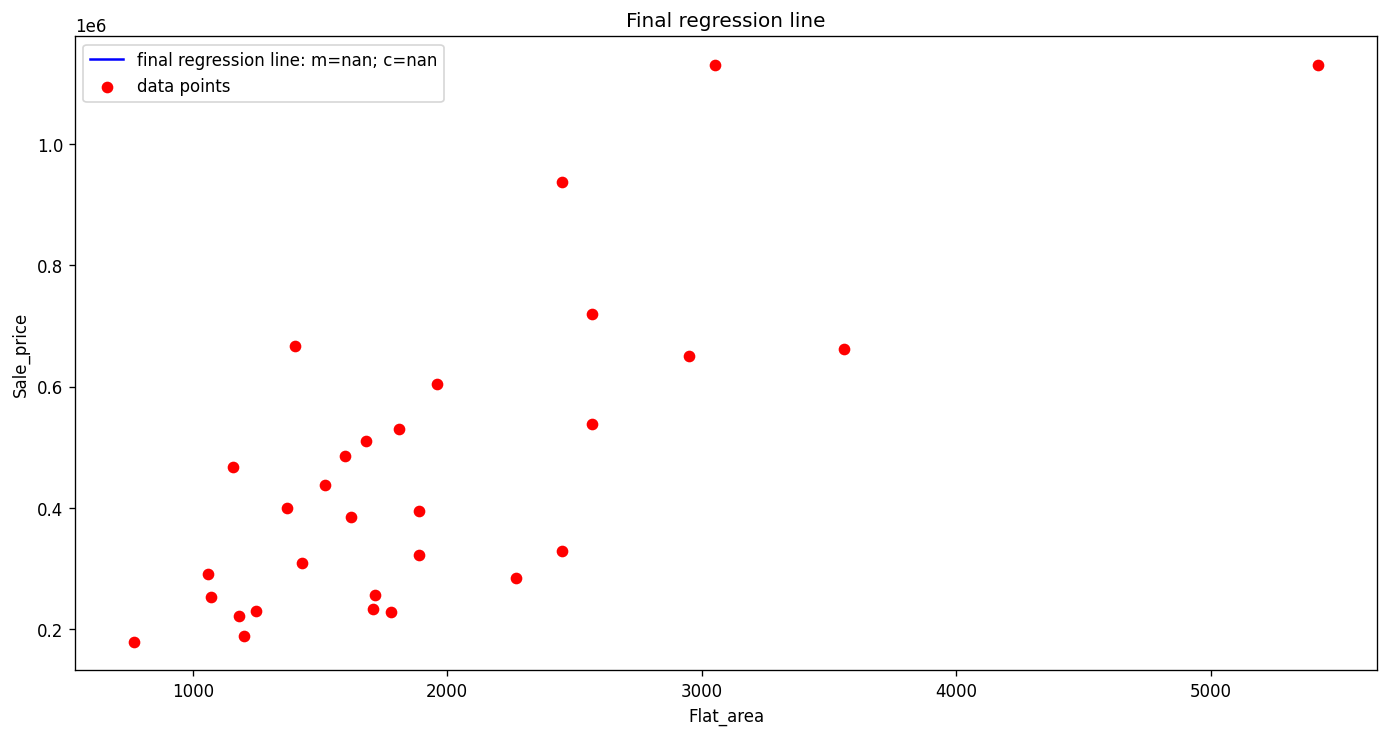

In [ ]:
## defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_prediction(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradient(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

After Iteration 0 : m = 0.11316346413633305 ; c = 1.1849780416165836e-16 ; Cost = 0.85836535863667
After Iteration 20 : m = 0.3275595607435688 ; c = 1.240489192847842e-16 ; Cost = 0.6182472245590185
After Iteration 40 : m = 0.4706921039517346 ; c = 1.3248661427193537e-16 ; Cost = 0.5112264752046607
After Iteration 60 : m = 0.5662485308150865 ; c = 1.415904430738617e-16 ; Cost = 0.46352728398628984
After Iteration 80 : m = 0.6300427631414932 ; c = 1.4951003398285442e-16 ; Cost = 0.4422677351921283
After Iteration 100 : m = 0.6726323011945988 ; c = 1.611303683072644e-16 ; Cost = 0.4327923457067555
After Iteration 120 : m = 0.7010654163122192 ; c = 1.666074685620818e-16 ; Cost = 0.42856916078553225
After Iteration 140 : m = 0.7200475906265729 ; c = 1.6660746856208182e-16 ; Cost = 0.4266868855601835
After Iteration 160 : m = 0.7327202415200801 ; c = 1.669405354694694e-16 ; Cost = 0.42584795473189874
After Iteration 180 : m = 0.7411806042798547 ; c = 1.6694053546946945e-16 ; Cost = 0.425474

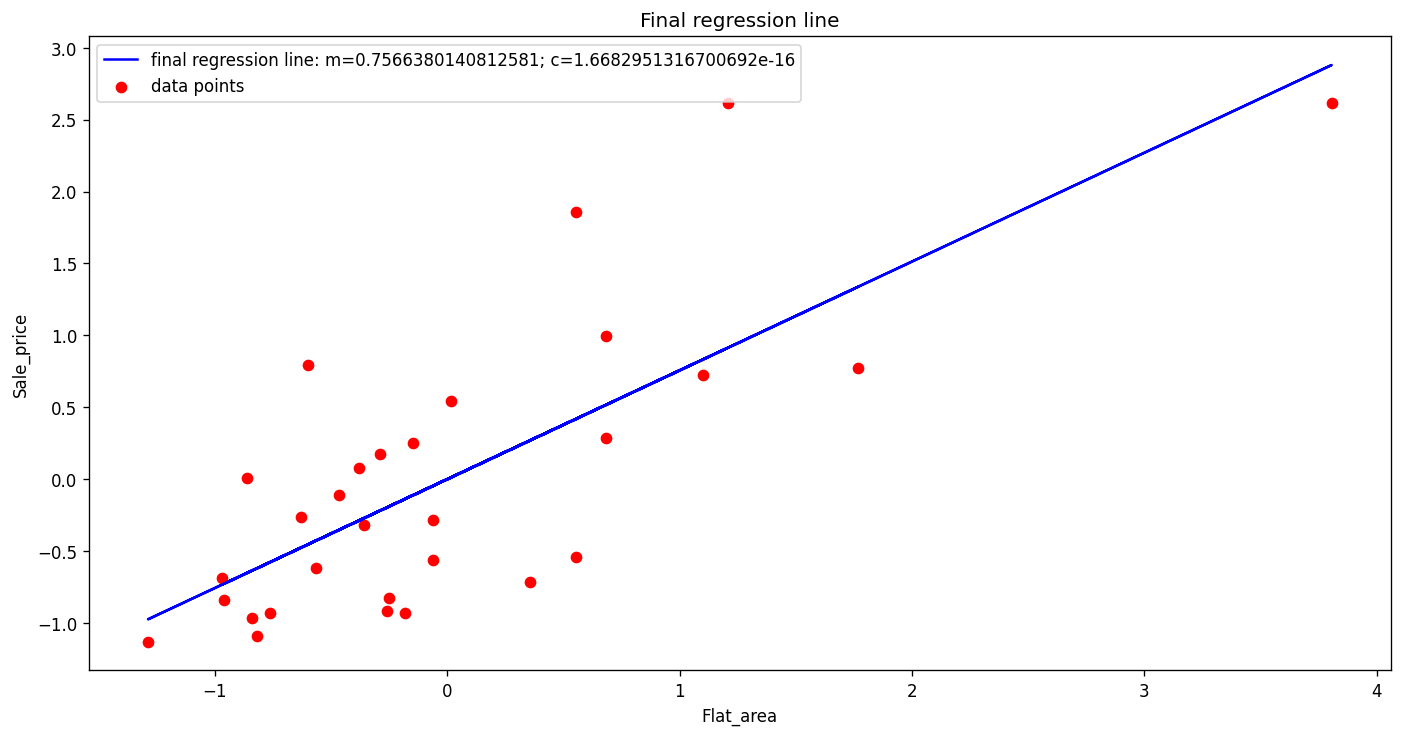

In [ ]:
# Gradient Desecent with scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
## defining and reshaping the dataset
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_prediction(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradient(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

## Part-4
### Treating Multicollinearity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


**Scaling the dataset**

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y= data['Sale_Price']  # target variable
X = scaler.fit_transform(data.drop(columns=['Sale_Price']))
X = pd.DataFrame(data=X,columns=data.drop(columns=['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,-0.306226,-0.943307,-0.260741,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,-0.746479,-0.432664,-0.187900,4.757239,-0.292306,0.735132,-0.597003,-0.089574,4.758385,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,-0.135806,1.070082,-0.172409,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,-1.271941,-0.914127,-0.284546,-0.167463,3.421068,-1.360300,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,1.199152,-0.272177,-0.192880,-0.167463,-0.292306,0.735132,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


**Checking and removing Multicollinearity**

In [4]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.008708,0.129569,0.391771,0.029264,-0.007198,0.028148,0.004778,-0.008847,-0.051957,0.018573,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,0.024570,0.223171,0.568568,0.087226,0.003551,-0.034281,0.190440,-0.166037,-0.077419,0.050282,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,0.052538,0.240091,0.756185,0.183223,0.023503,-0.018182,0.102627,-0.083995,-0.065334,0.055111,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.085719,0.229449,0.144507,0.718527,0.013835,-0.014503,-0.011334,0.013033,0.037619,0.007736,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,0.049692,0.125620,0.280106,-0.011204,-0.000901,-0.120524,0.317934,-0.257680,-0.055951,0.006297,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.006162,-0.078453,0.280452,0.072561,0.093546,0.034392,-0.037127,0.022690,-0.018557,0.104051,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,0.111226,0.201736,0.681362,0.107581,-0.024388,-0.082628,0.197510,-0.140113,-0.090561,0.010010,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.000819,0.343793,0.731996,0.194106,0.010491,-0.088424,0.194517,-0.142458,-0.058931,0.023202,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.110451,-0.144822,0.200302,0.017263,0.029158,0.127876,-0.151347,0.092539,-0.025312,0.070969,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,0.148083,-0.409515,-0.326307,-0.071016,0.203375,0.244330,-0.391693,0.257392,0.067269,0.225182,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


900 corellation , working with this is very hectic

In [5]:
# pair of independent variables with corellation greater then 0.5
k = X.corr()
z= [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>0.5 and (i!=j))]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

### Calculating VIF

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X

# calculating VIF for each column
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [7]:
VIF[VIF==VIF.max()].index[0]

'Flat Area (in Sqft)'

In [8]:
def MC_remover(data):
  vif = pd.Series([ variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
  if vif.max()>5:
    print(vif[vif==vif.max()].index[0],"has been removed")
    data = data.drop(columns=[vif[vif==vif.max()].index[0]])
    return data
  else:
    print("No multicollinerty present anymore")
    return data

In [9]:
for i in range(7):
  vif_data = MC_remover(vif_data)
vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No multicollinerty present anymore
No multicollinerty present anymore
No multicollinerty present anymore
No multicollinerty present anymore
No multicollinerty present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,-0.306226,-0.943307,-0.260741,-0.167463,-0.292306,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,-0.746479,-0.432664,-0.187900,4.757239,-0.292306,-0.597003,-0.089574,4.758385,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,-0.135806,1.070082,-0.172409,-0.167463,-0.292306,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,-1.271941,-0.914127,-0.284546,-0.167463,3.421068,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,1.199152,-0.272177,-0.192880,-0.167463,-0.292306,-0.597003,-0.089574,-0.210155,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


### Remaining columns

In [10]:
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(VIF)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

### Train/Test set

In [14]:
X=vif_data
y=data['Sale_Price']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

### Linear regression

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
# lr.fit()-->this function implements the gradient descent and the complete procedure over the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [19]:
lr.coef_
# coefficient is nothing but y=m1x1+m2x2.....
# Since data is normalized therefore m0=0

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

### Generating prediction over test set

In [21]:
prediction = lr.predict(X_test)
lr.score(X_test,y_test)  # predict R^2

0.8461987715586199

## verifying the assumption of Linear regression

## 1 Residuals

In [23]:
residuals = prediction- y_test
residuals_table = pd.DataFrame({'residuals':residuals,
                                'prediction':prediction})
residuals_table = residuals_table.sort_values(by='prediction')

In [24]:
z = [i for i in range(int(residuals_table['prediction'].max()))]
k = [0 for i in range(int(residuals_table['prediction'].max()))]

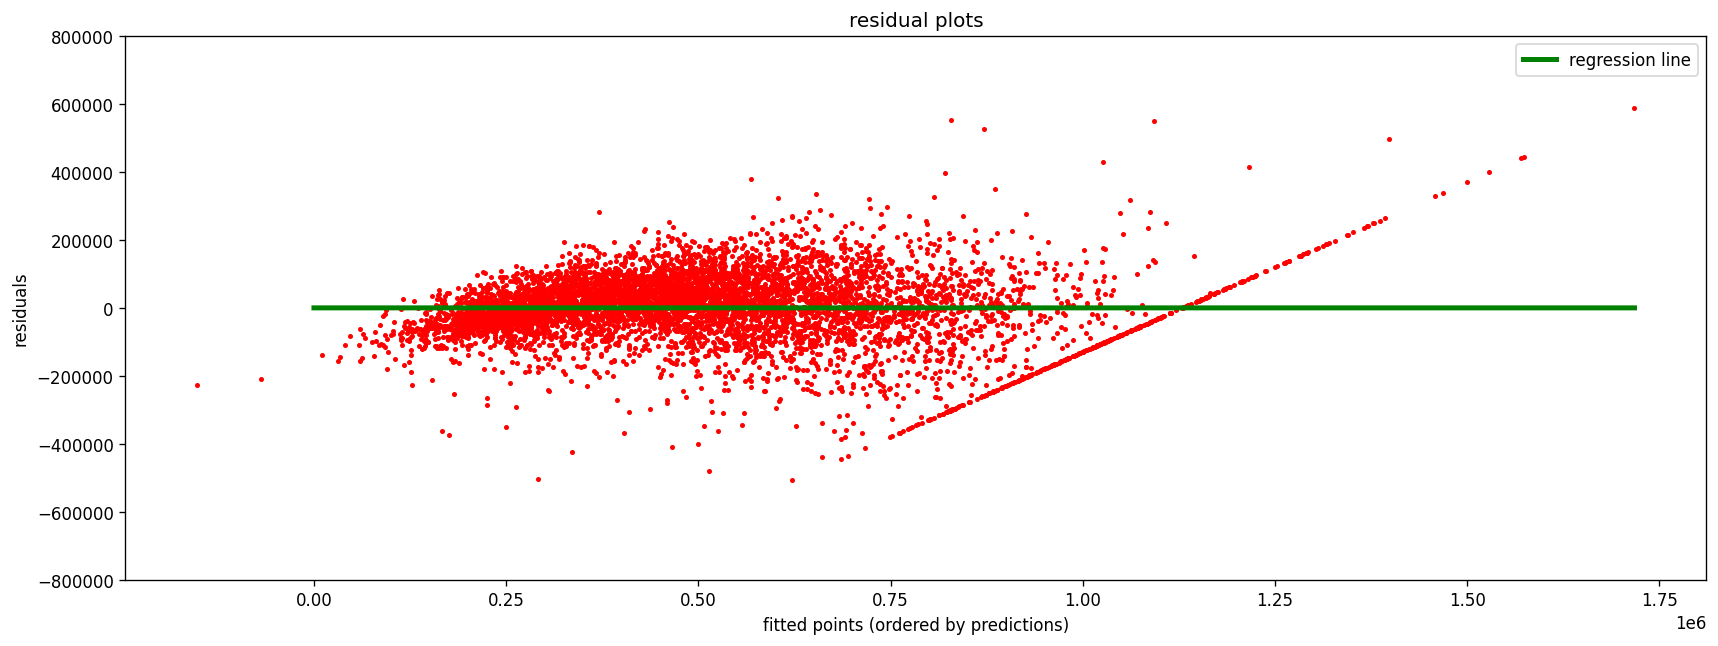

In [29]:
plt.figure(dpi=120,figsize=(17,6))

plt.scatter(residuals_table['prediction'],residuals_table['residuals'],color='red',s=4)
plt.plot(z,k,color='green',linewidth=3,label="regression line")
plt.ylim(-800000,800000)
plt.xlabel("fitted points (ordered by predictions)")
plt.ylabel("residuals")
plt.title("residual plots")
plt.legend()
plt.show()

Conclusion:

1)The residuals are densely populated between the limit 200000 and -200000.

2) There is good possiblity that the residuals are normally distributed

#### But some outlier present



### 2. Distribution of errors

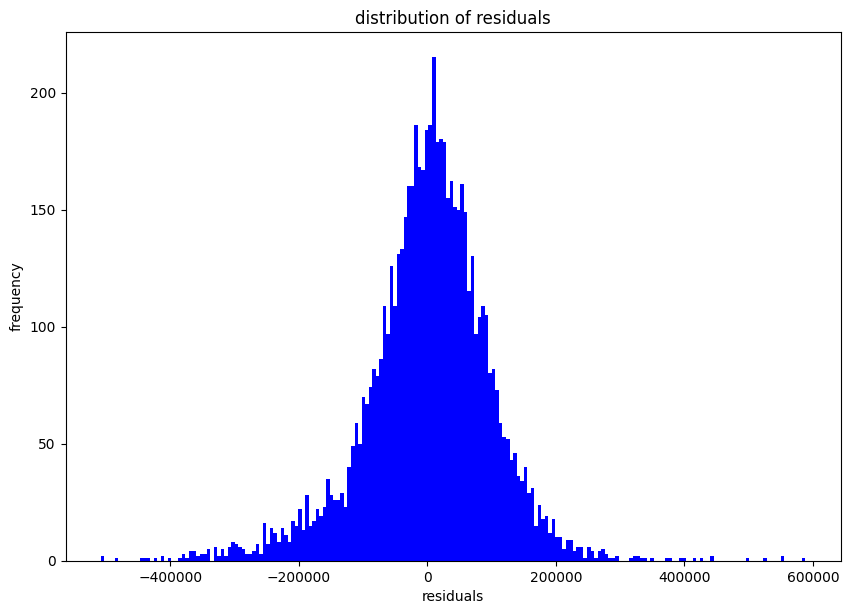

In [30]:
plt.figure(dpi=100,figsize=(10,7))
plt.hist(residuals_table['residuals'],color='blue',bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

Conclusion:

1. Graph is normally distributed but some outlier is also present at far right of plot

### Model Coefficients

In [31]:
coefficients_table = pd.DataFrame({
    "columns":X_train.columns,
    "coefficients":lr.coef_
})
coefficients_table = coefficients_table.sort_values(by='coefficients')

No handles with labels found to put in legend.


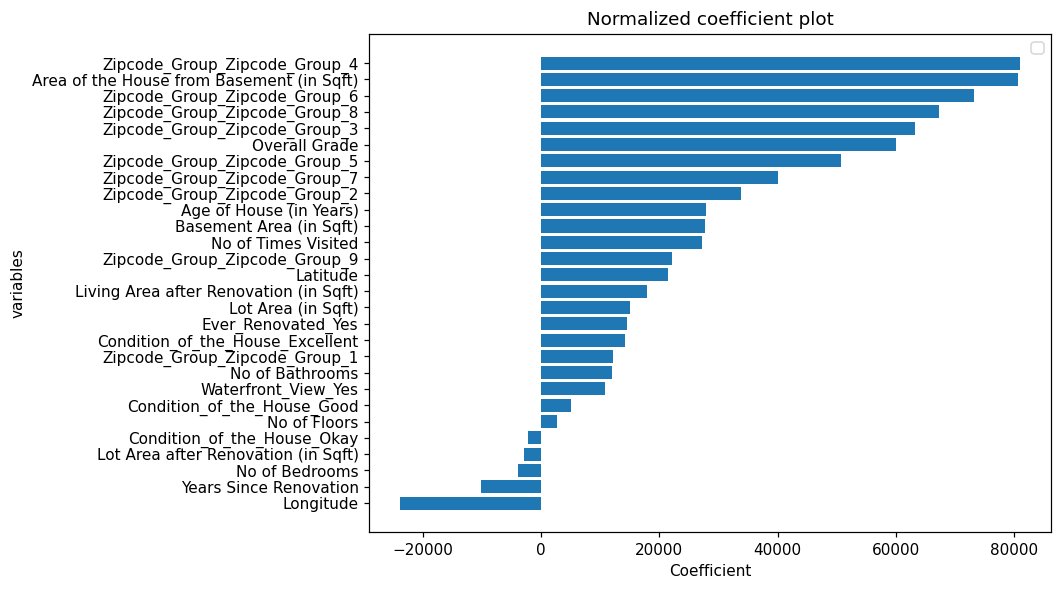

In [32]:
plt.figure(figsize=(8,6),dpi=110)
x = coefficients_table['columns']
y=coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel('Coefficient')
plt.ylabel('variables')
plt.title("Normalized coefficient plot")
plt.legend()
plt.show()

Conclusion:

1- Zip code group plays important role. The location plays a major role in the "Sale_Price" of the house.

2-Area of house from basement plays a major role, overall grade plays important role.

3- Our model says that older house are more expensive than newer house(New knowledge XD )

4- Year of renovation comes under negative plot.

5- Latitude and Longitude plays a very important role. Hence geographic location also plays imp role.